In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline

# 1. Load Data

In [60]:
df = pd.read_csv('pseudo_sigmoid_batches_long.csv')

In [61]:
df

,batch,data_point,value
0,Batch_1,0.000000,0.031108
1,Batch_1,0.005005,0.073149
2,Batch_1,0.010010,0.000000
3,Batch_1,0.015015,0.000000
4,Batch_1,0.020020,0.075847
...,...,...,...
19995,Batch_20,4.979980,0.972519
19996,Batch_20,4.984985,0.997452
19997,Batch_20,4.989990,0.986163
19998,Batch_20,4.994995,0.987074


In [62]:
df = df.rename(columns = {'value':'Raw Signal', 'data_point':'Volume', 'batch':'Batch'})
#df_final = df_final[df_final["Batch"] == "Batch_1"]
df


,Batch,Volume,Raw Signal
0,Batch_1,0.000000,0.031108
1,Batch_1,0.005005,0.073149
2,Batch_1,0.010010,0.000000
3,Batch_1,0.015015,0.000000
4,Batch_1,0.020020,0.075847
...,...,...,...
19995,Batch_20,4.979980,0.972519
19996,Batch_20,4.984985,0.997452
19997,Batch_20,4.989990,0.986163
19998,Batch_20,4.994995,0.987074


# 2. Preprocess data

In [63]:
from preprocessing import process_dataframe

In [64]:
results = process_dataframe(df,batch_col='Batch', signal_col='Raw Signal', 
                      window_length=201, polyorder=2, num_smoothing_passes=2,
                      smoothed_col_name='smoothed_signal', 
                      normalized_col_name='normalized_signal',
                      derivative_col_name='first_derivative')

In [65]:
results

,Batch,Volume,Raw Signal,smoothed_signal,normalized_signal,first_derivative,normalized_first_derivative
0,Batch_1,0.000000,0.031108,0.015863,0.001596,-0.000074,0.033550
1,Batch_1,0.005005,0.073149,0.015791,0.001521,-0.000074,0.033788
2,Batch_1,0.010010,0.000000,0.015720,0.001448,-0.000072,0.034264
3,Batch_1,0.015015,0.000000,0.015651,0.001377,-0.000070,0.034741
4,Batch_1,0.020020,0.075847,0.015584,0.001308,-0.000068,0.035217
...,...,...,...,...,...,...,...
19995,Batch_20,4.979980,0.972519,0.988831,0.999779,0.000055,0.032011
19996,Batch_20,4.984985,0.997452,0.988885,0.999834,0.000055,0.032067
19997,Batch_20,4.989990,0.986163,0.988939,0.999889,0.000055,0.032122
19998,Batch_20,4.994995,0.987074,0.988993,0.999944,0.000055,0.032178


In [66]:
from plots import plot_processed_dataframe

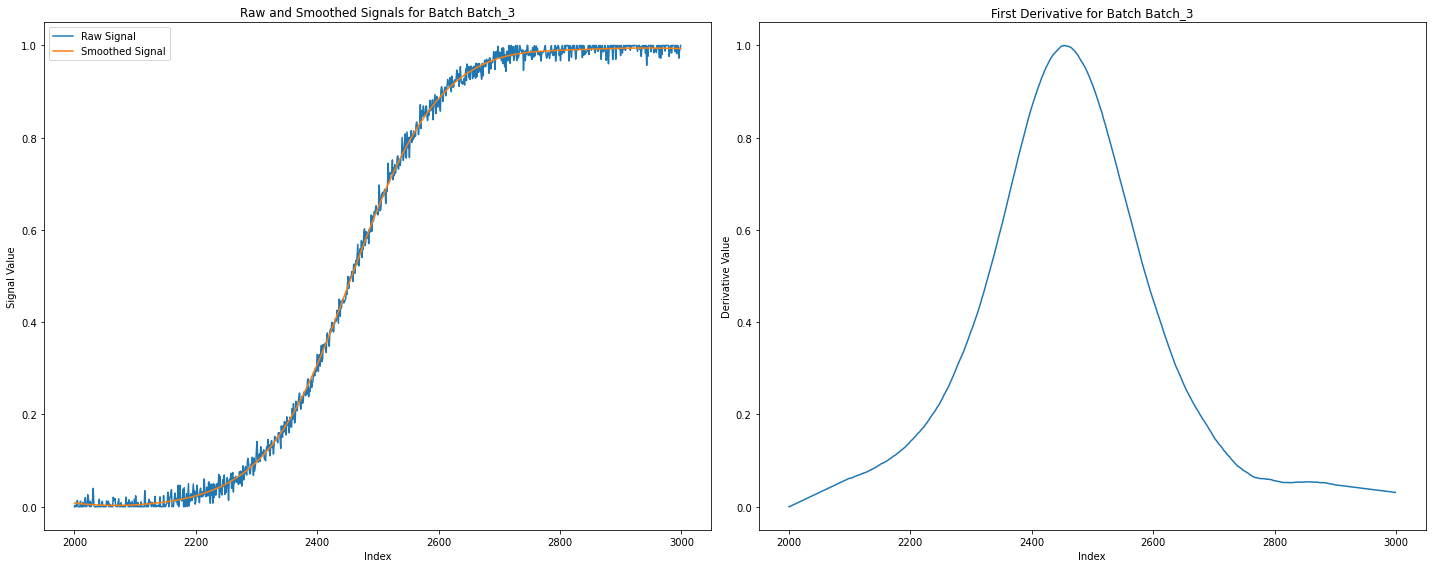

In [67]:
plot_processed_dataframe(results, 'Batch', 'Raw Signal', 'smoothed_signal', 'normalized_first_derivative', 'Batch_3')

# 3. Metrics

In [68]:
from metrics import calculate_metrics
from metrics import calculate_control_limits

In [69]:
metrics = calculate_metrics(results, volume_col="Volume", signal_col="normalized_signal", deriv_col="normalized_first_derivative", batch_col='Batch')
metrics

,Batch,Direct AF,Transwidth,Inflection Points,Max Rate of Change
0,Batch_1,0.968798,1.951320,24,0.608095
1,Batch_2,0.981219,1.907426,41,0.721429
2,Batch_3,0.994186,1.998122,3,0.656030
3,Batch_4,0.976491,1.941431,4,0.682781
4,Batch_5,1.014621,1.919643,1,0.719120
5,Batch_6,1.006143,2.018686,2,0.652566
6,Batch_7,1.006406,1.919789,42,0.807365
7,Batch_8,0.988934,1.921650,11,0.591056
8,Batch_9,0.995684,1.960592,12,0.700156
9,Batch_10,0.997641,1.977994,29,0.663276


In [70]:
control_limits = calculate_control_limits(metrics)
control_limits

,Metric,Mean,LCL,UCL
0,Direct AF,0.995663,0.953350,1.037976
1,Transwidth,1.958432,1.845011,2.071854
2,Inflection Points,14.500000,-28.210161,57.210161
3,Max Rate of Change,0.676982,0.467731,0.886234


# 4. Control Charts

In [71]:
from plots import create_control_charts

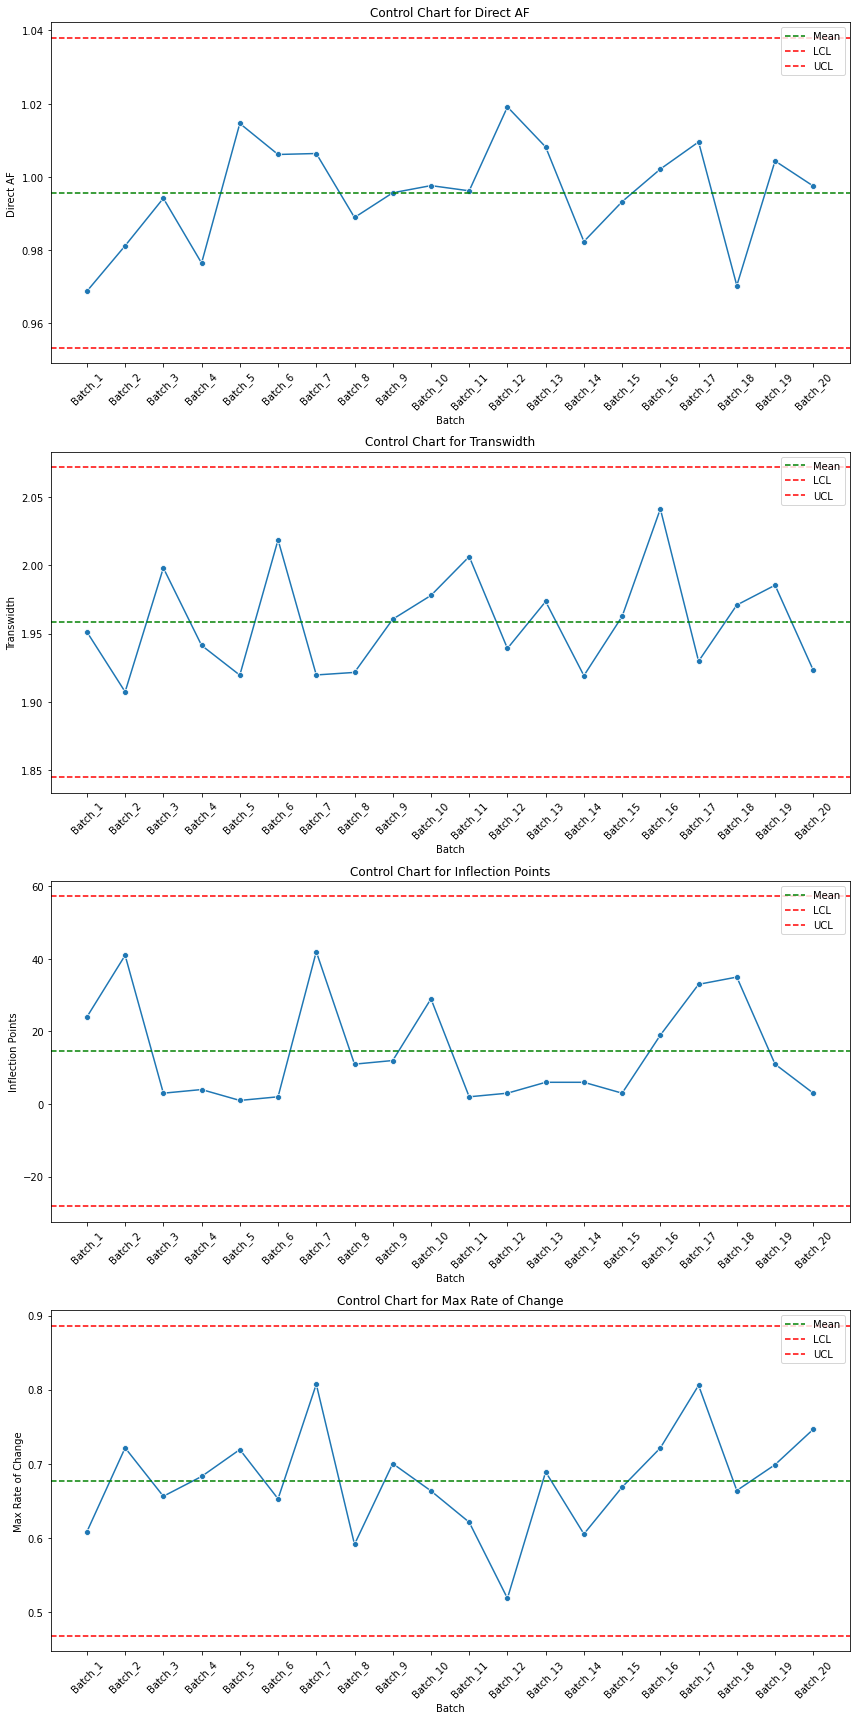

In [72]:
create_control_charts(metrics_df=metrics, control_limits_df=control_limits)

# 5. Exploratory Plots

In [73]:
def plot_signal(df, volume_col, signal_col, batch_col):
    
    plt.figure(figsize=(12, 12))
    sns.lineplot(data=df, x=volume_col, y=signal_col, hue=batch_col, alpha=0.5)
    plt.show()

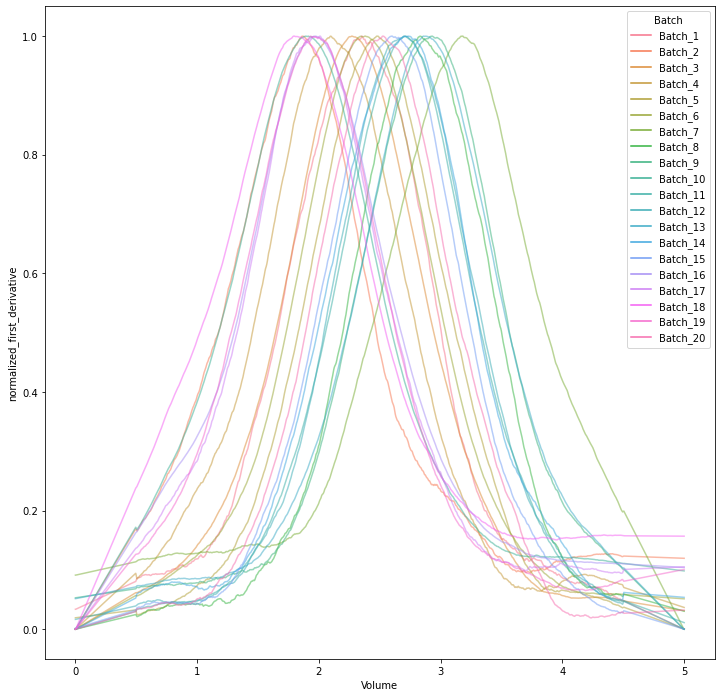

In [83]:
plot_signal(results, 'Volume', 'normalized_first_derivative', 'Batch')

In [75]:
from plots import plot_transwidth

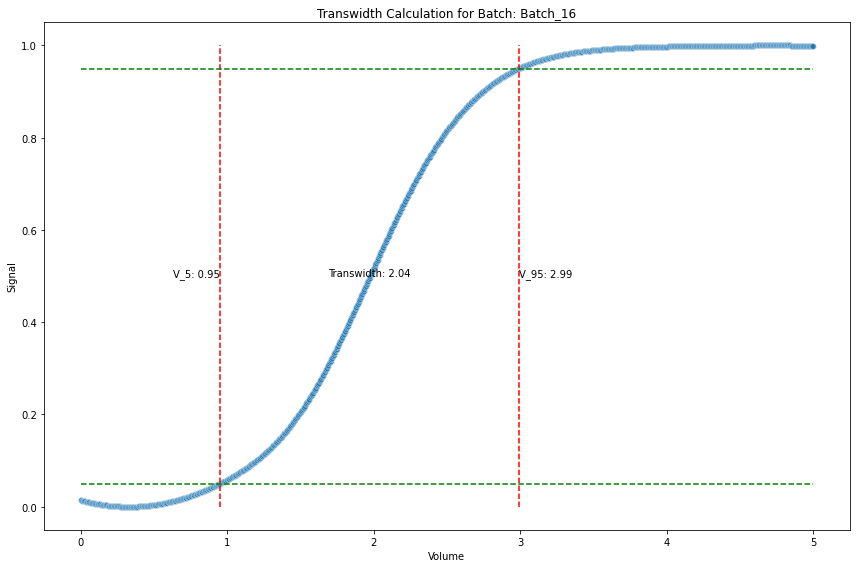

In [76]:

plot_transwidth(results, volume_col="Volume", signal_col="normalized_signal", batch_col="Batch", batch="Batch_16")

In [77]:
from plots import plot_direct_af

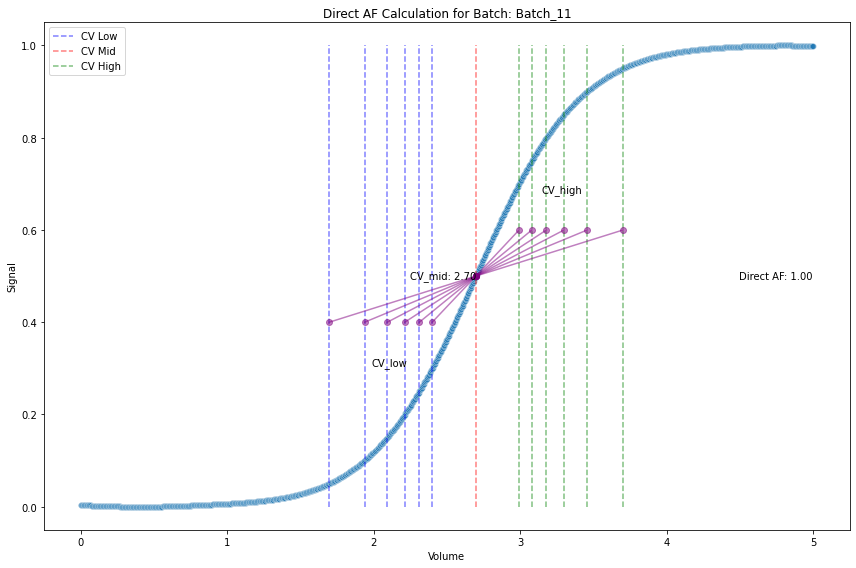

In [78]:
plot_direct_af(results, volume_col="Volume", signal_col="normalized_signal", batch_col="Batch", batch="Batch_11")

In [79]:
from plots import plot_inflection_points

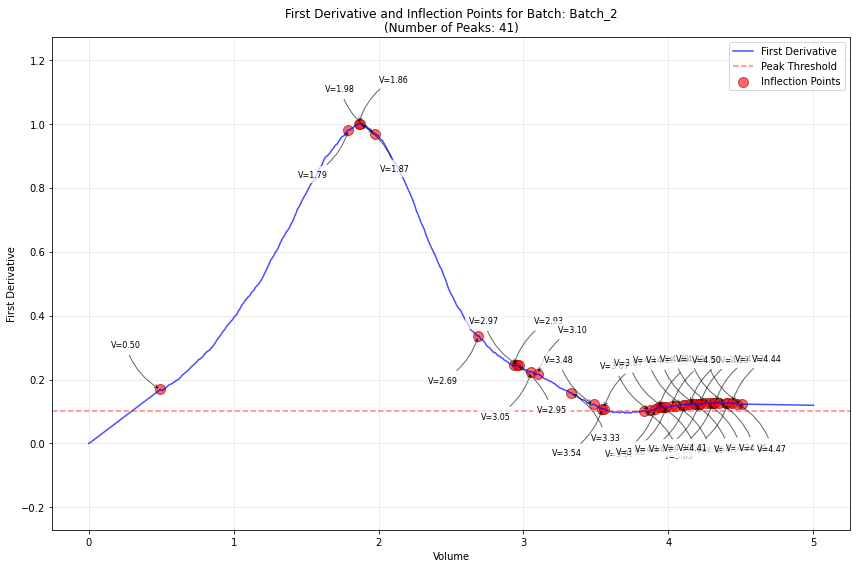

In [84]:
plot_inflection_points(df=results, volume_col="Volume", deriv_col="normalized_first_derivative", batch_col="Batch", batch="Batch_2")

In [81]:
from plots import plot_max_rate_of_change

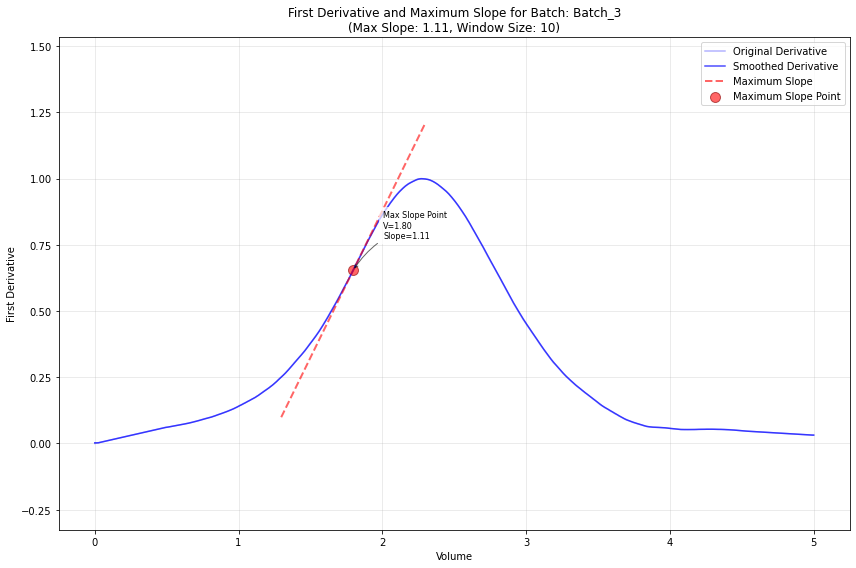

In [85]:
plot_max_rate_of_change(df=results, volume_col="Volume", deriv_col="normalized_first_derivative", batch_col="Batch", batch="Batch_3")